# import lib drive and load data mock up
no relate to accuracy!?
<br>this can use to see event rate drift from y_proba instead
<br> constrain : got update on that month actual label (event rate updated)

In [143]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


In [145]:
df0 = pd.read_csv("/content/drive/MyDrive/com7_cradit_scoring/Ai monitoring/mock_y_pred_mZero.csv")
df1 = pd.read_csv("/content/drive/MyDrive/com7_cradit_scoring/Ai monitoring/mock_y_pred_m1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/com7_cradit_scoring/Ai monitoring/mock_y_pred_m2.csv")


In [146]:
df2["0"].head()

0    0.557630
1    0.509010
2    0.565759
3    0.647003
4    0.628223
Name: 0, dtype: float64

In [147]:
df0.drop('Unnamed: 0', axis=1, inplace = np.True_)
df1.drop('Unnamed: 0', axis=1, inplace = np.True_)
df2.drop('Unnamed: 0', axis=1, inplace = np.True_)


In [148]:
df0 # month zero (deployment month)

,0
0,0.389579
1,0.345097
2,0.355435
3,0.353843
4,0.255176
...,...
9995,0.129192
9996,0.444158
9997,0.368024
9998,0.507289


# Confident interval with month zero (refference deployment month)

In [149]:
# import scipy.stats as st

In [150]:
df0['0']

0       0.389579
1       0.345097
2       0.355435
3       0.353843
4       0.255176
          ...   
9995    0.129192
9996    0.444158
9997    0.368024
9998    0.507289
9999    0.443057
Name: 0, Length: 10000, dtype: float64

In [151]:
data  = list(df0['0'])

# create 95% confidence interval
low_bon = np.quantile(data, 0.025)
high_bon = np.quantile(data, 0.975)
print("95% interval from {} to {}".format(low_bon,high_bon))

95% interval from 0.11406714178877335 to 0.49752131663964155


In [152]:
low_bon/high_bon

0.2292708633254262

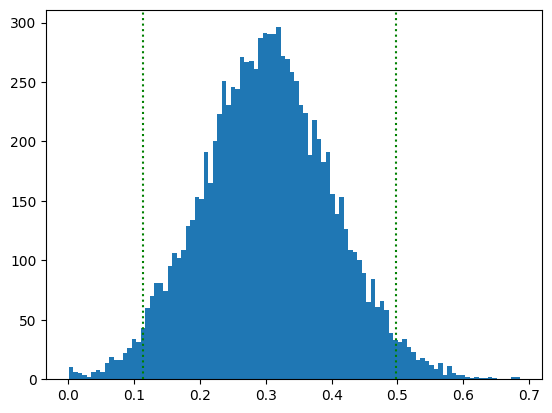

In [153]:
plt.hist(data, bins=100)
plt.axvline(x=low_bon, color='green', linestyle=':')
plt.axvline(x=high_bon, color='green', linestyle=':')

# Confident interval with month 1 (1st month)

In [181]:
# import scipy.stats as st

In [182]:
df1['0']

0       0.441606
1       0.431918
2       0.417767
3       0.406914
4       0.445566
          ...   
9995    0.500640
9996    0.483361
9997    0.339048
9998    0.349489
9999    0.393238
Name: 0, Length: 10000, dtype: float64

In [183]:
data  = list(df1['0'])

# create 95% confidence interval
low_bon = np.quantile(data, 0.025)
high_bon = np.quantile(data, 0.975)
print("95% interval from {} to {}".format(low_bon,high_bon))

95% interval from 0.18332933080901878 to 0.5744405954764166


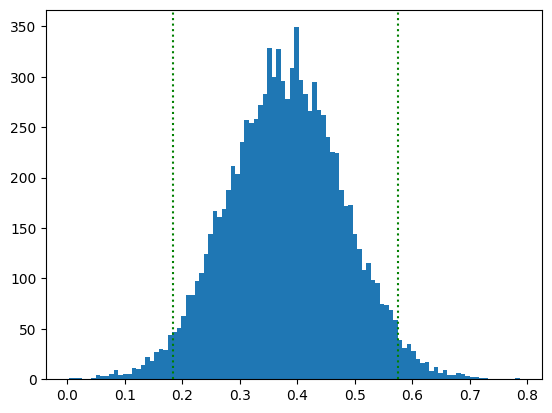

In [184]:
plt.hist(data, bins=100)
plt.axvline(x=low_bon, color='green', linestyle=':')
plt.axvline(x=high_bon, color='green', linestyle=':')

# M0 (self) Relative accuracy percentage = (Absolute error / True value) * 100%

In [185]:
def calculate_relative_accuracy_percentage(refference_values, current_values):
    relative_accuracy_percentages = []
    for true_value, prediction in zip(refference_values, current_values):
        absolute_error = abs(true_value - prediction)
        relative_accuracy_percentage = (absolute_error / true_value) * 1.0
        relative_accuracy_percentages.append(relative_accuracy_percentage)
    return relative_accuracy_percentages

In [186]:
refference_values = [0.7, 0.8, 0.6, 0.65, 0.77] # month zero???? ---- refference month
# month 1 - month 5
refference_values = df0['0'][:10000]
refference_values

0       0.389579
1       0.345097
2       0.355435
3       0.353843
4       0.255176
          ...   
9995    0.129192
9996    0.444158
9997    0.368024
9998    0.507289
9999    0.443057
Name: 0, Length: 10000, dtype: float64

In [187]:
current_values = [0.6, 0.7, 0.6, 0.6, 0.75] # month 1st???? ---- current month
current_values = df0['0'][:10000]

In [ ]:
history_acc = calculate_relative_accuracy_percentage(refference_values, current_values)
history_acc

average y_proba on current month 0.3023794686565615


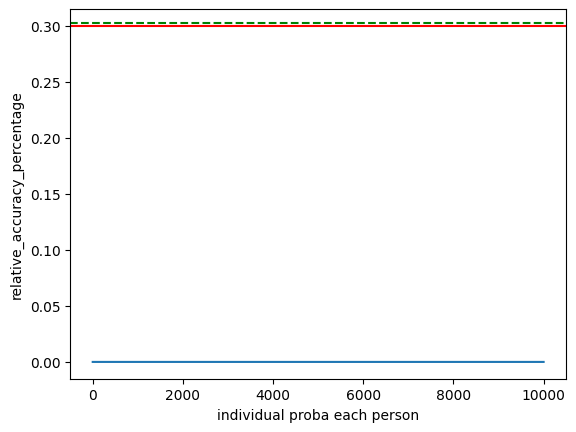

In [189]:
acceptable_accuracy_threshold = 0.30
print("average y_proba on current month", np.mean(current_values))

plt.plot(history_acc)
plt.axhline(y=acceptable_accuracy_threshold, color='r', linestyle='-')
plt.axhline(y=np.mean(current_values), color='green', linestyle='--')
plt.ylabel("relative_accuracy_percentage")
plt.xlabel("individual proba each person")
plt.show()

# M1 Relative accuracy percentage = (Absolute error / True value) * 100%

In [215]:
def calculate_relative_accuracy_percentage(refference_values, current_values):
    relative_accuracy_percentages = []
    for true_value, prediction in zip(refference_values, current_values):
        absolute_error = abs(true_value - prediction)
        relative_accuracy_percentage = (absolute_error / true_value) * 1.0
        relative_accuracy_percentages.append(relative_accuracy_percentage)
    return relative_accuracy_percentages

In [216]:
refference_values = [0.7, 0.8, 0.6, 0.65, 0.77] # month zero???? ---- refference month
# month 1 - month 5
refference_values = df0['0'][:10000]
refference_values

0       0.389579
1       0.345097
2       0.355435
3       0.353843
4       0.255176
          ...   
9995    0.129192
9996    0.444158
9997    0.368024
9998    0.507289
9999    0.443057
Name: 0, Length: 10000, dtype: float64

In [217]:
current_values = [0.6, 0.7, 0.6, 0.6, 0.75] # month 1st???? ---- current month
current_values = df1['0'][:10000]

In [218]:
history_acc = calculate_relative_accuracy_percentage(refference_values, current_values)
result = list(filter(lambda x: x < 1, history_acc))

In [220]:
len(result)

8474

In [222]:
len(list(filter(lambda x: x > 1, history_acc)))

1526

average y_proba on current month 0.37980542933602135


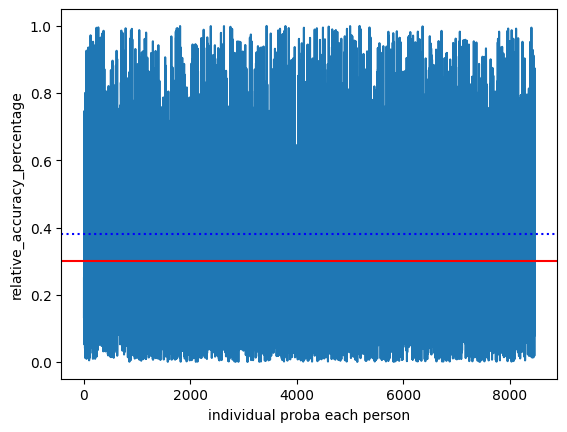

In [221]:
acceptable_accuracy_threshold = 0.3
print("average y_proba on current month", np.mean(current_values))

plt.plot(result)
plt.axhline(y=acceptable_accuracy_threshold, color='r', linestyle='-')
plt.axhline(y=np.mean(current_values), color='b', linestyle=':')
# plt.axhline(y=np.mean(df0['0'][:100]), color='g', linestyle='--')

plt.ylabel("relative_accuracy_percentage")
plt.xlabel("individual proba each person")
plt.show()

# M2 Relative accuracy percentage = (Absolute error / True value) * 100%

In [223]:
def calculate_relative_accuracy_percentage(refference_values, current_values):
    relative_accuracy_percentages = []
    for true_value, prediction in zip(refference_values, current_values):
        absolute_error = abs(true_value - prediction)
        relative_accuracy_percentage = (absolute_error / true_value) * 1.0
        relative_accuracy_percentages.append(relative_accuracy_percentage)
    return relative_accuracy_percentages

In [224]:
refference_values = [0.7, 0.8, 0.6, 0.65, 0.77] # month zero???? ---- refference month
# month 1 - month 5
refference_values = df0['0'][:10000]
refference_values

0       0.389579
1       0.345097
2       0.355435
3       0.353843
4       0.255176
          ...   
9995    0.129192
9996    0.444158
9997    0.368024
9998    0.507289
9999    0.443057
Name: 0, Length: 10000, dtype: float64

In [225]:
current_values = [0.6, 0.7, 0.6, 0.6, 0.75] # month 1st???? ---- current month
current_values = df2['0'][:10000]

In [226]:
history_acc = calculate_relative_accuracy_percentage(refference_values, current_values)
result = list(filter(lambda x: x < 1, history_acc))

In [227]:
type(result)

list

In [228]:
len(result)

5151

In [229]:
len(list(filter(lambda x: x > 1, history_acc)))

4849

average y_proba on current month 0.5984606180719467


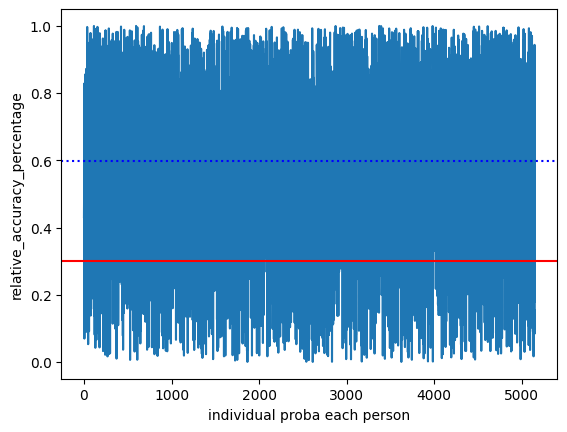

In [230]:
acceptable_accuracy_threshold = 0.30
print("average y_proba on current month", np.mean(current_values))

plt.plot(result)
plt.axhline(y=acceptable_accuracy_threshold, color='r', linestyle='-')
plt.axhline(y=np.mean(current_values), color='b', linestyle=':')
plt.ylabel("relative_accuracy_percentage")
plt.xlabel("individual proba each person")
plt.show()